# **Data Cleaning & Preparation**

### Feature Selection

### **Target Pertemuan**

<hr>

**Tujuan Instruksional Umum:** Peserta mampu mempersiapkan data untuk pembuatan model machine learning.

**Target Pertemuan:** Peserta mampu melakukan  feature selection.

<hr>

## **Feature Selection**
### **Intro**

We all may have faced this problem of identifying the related features from a set of data and removing the irrelevant or less important features with do not contribute much to our target variable in order to achieve better accuracy for our model.

``Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model.`` The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

Irrelevant or partially relevant features can negatively impact model performance.

Feature selection and Data cleaning should be the **first and most important** step of your model designing.

## **What are benefits of performing feature selection before modeling your data?**

* **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.
* **Improves Accuracy**: Less misleading data means modeling accuracy improves.
* **Reduces Training Time**: fewer data points reduce algorithm complexity and algorithms train faster.

#### **Dataset**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier


df = pd.read_csv("train_mobile_price.csv")
X = df.iloc[:,0:20]  #independent columns/feature non target
y = df.iloc[:,-1]    #target column i.e price range
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## **How to performing feature selection?**

### **1. Univariate Selection**
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [2]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


### **2. Feature Importance**
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.05825244 0.01983048 0.03262996 0.01935063 0.03108576 0.01821543
 0.03503204 0.03357561 0.036632   0.0332276  0.03392529 0.04709468
 0.04998856 0.39619159 0.0343586  0.0338252  0.03421107 0.01524275
 0.01778307 0.01954725]


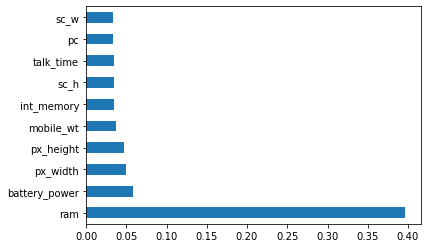

In [4]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### **3. Correlation Matrix with Heatmap**
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

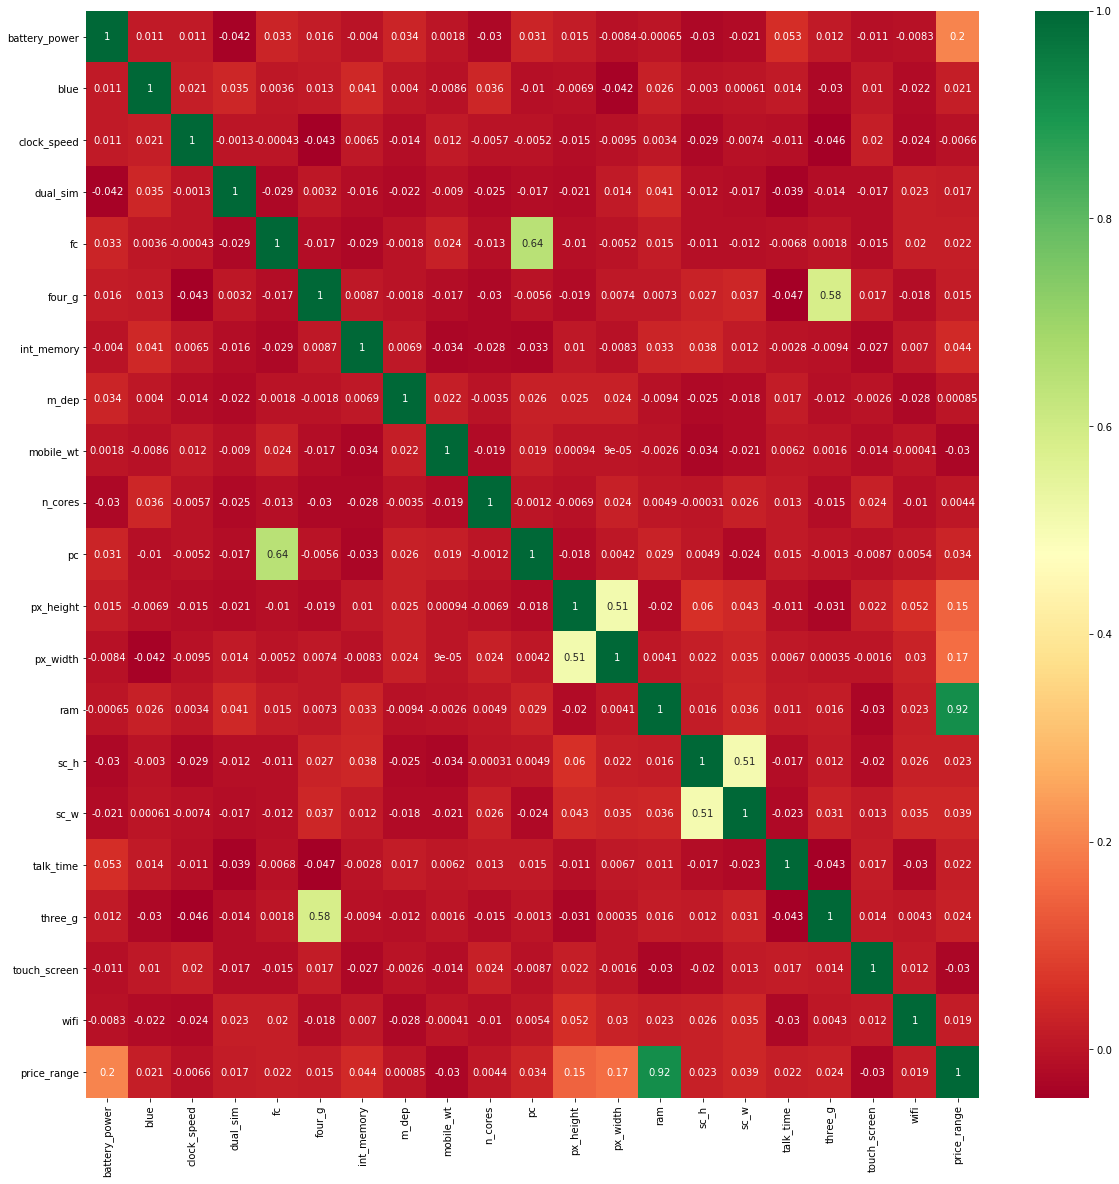

In [9]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### **Take Class Exercise**
Tugas Feature Selection menggunakan:
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap

Data yang digunakan adalah melb_data.csv. Lakukan feature selection pada data yang sudah bersih dari NaN, tapi belum tahap scalling. Independent feature (X) adalah **'Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom'**, lalu target feature-nya adalah **'Price'**. 

Jelaskan urutan dari feature yang paling relevan/penting/berkontribusi!

In [4]:
df_melb = pd.read_csv('melb_data.csv')
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [10]:
df_test = df_melb[['Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom', 'Price']]
# df_test.isna().sum()

In [6]:
df_clean = df_test.dropna()

In [7]:
df_clean.isna().sum()

Distance    0
Car         0
Landsize    0
Rooms       0
Bedroom2    0
Bathroom    0
Price       0
dtype: int64

In [11]:
df_clean.head()

,Distance,Car,Landsize,Rooms,Bedroom2,Bathroom,Price
0,2.5,1.0,202.0,2,2.0,1.0,1480000.0
1,2.5,0.0,156.0,2,2.0,1.0,1035000.0
2,2.5,0.0,134.0,3,3.0,2.0,1465000.0
3,2.5,1.0,94.0,3,3.0,2.0,850000.0
4,2.5,2.0,120.0,4,3.0,1.0,1600000.0


In [8]:
def find_outlier(yourList):
    Q1 = np.quantile(yourList, .25)
    Q2 = np.quantile(yourList, .50) #median
    Q3 = np.quantile(yourList, .75)

    IQR = (Q3 - Q1) * 1.5
    batas_bawah = Q1 - IQR
    batas_atas = Q3 + IQR
    
    outlier = ''
    for i in range(len(yourList)):
        if yourList[i] > batas_atas:
            outlier = outlier + str(yourList[i]) + ', '
        if yourList[i] < batas_bawah:
            outlier = outlier + str(yourList[i]) + ', '
    return outlier

In [9]:
distance = df_clean['Distance'].sort_values().values.tolist()
car = df_clean['Car'].sort_values().values.tolist()
landsize = df_clean['Landsize'].sort_values().values.tolist()
rooms = df_clean['Rooms'].sort_values().values.tolist()
bedroom = df_clean['Bedroom2'].sort_values().values.tolist()
bathroom = df_clean['Bathroom'].sort_values().values.tolist()

print('Jumlah outlier feature distance yaitu:', len(find_outlier(distance)))
print('Jumlah outlier feature car yaitu:', len(find_outlier(car)))
print('Jumlah outlier feature landsize yaitu:', len(find_outlier(landsize)))
print('Jumlah outlier feature rooms yaitu:', len(find_outlier(rooms)))
print('Jumlah outlier feature bedroom yaitu:', len(find_outlier(bedroom)))
print('Jumlah outlier feature bathroom yaitu:', len(find_outlier(bathroom)))

Jumlah outlier feature distance yaitu: 2478
Jumlah outlier feature car yaitu: 3223
Jumlah outlier feature landsize yaitu: 2947
Jumlah outlier feature rooms yaitu: 2047
Jumlah outlier feature bedroom yaitu: 3277
Jumlah outlier feature bathroom yaitu: 715


In [65]:
from sklearn.preprocessing import RobustScaler

df_clean['Distance Rbs'] = RobustScaler().fit_transform(df_clean[['Distance']])
df_clean['Car Rbs'] = RobustScaler().fit_transform(df_clean[['Car']])
df_clean['Landsize Rbs'] = RobustScaler().fit_transform(df_clean[['Landsize']])
df_clean['Rooms Rbs'] = RobustScaler().fit_transform(df_clean[['Rooms']])
df_clean['Bedroom2 Rbs'] = RobustScaler().fit_transform(df_clean[['Bedroom2']])
df_clean['Bathroom Rbs'] = RobustScaler().fit_transform(df_clean[['Bathroom']])

df_ready = df_clean[['Distance Rbs', 'Car Rbs', 'Landsize Rbs', 'Rooms Rbs', 'Bedroom2 Rbs', 'Bathroom Rbs', 'Price']]
df_ready.head()

<ipython-input-65-db471587e814>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Distance Rbs'] = RobustScaler().fit_transform(df_clean[['Distance']])
<ipython-input-65-db471587e814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Car Rbs'] = RobustScaler().fit_transform(df_clean[['Car']])
<ipython-input-65-db471587e814>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Distance Rbs,Car Rbs,Landsize Rbs,Rooms Rbs,Bedroom2 Rbs,Bathroom Rbs,Price
0,-0.985294,-1.0,-0.508457,-1.0,-1.0,0.0,1480000.0
1,-0.985294,-2.0,-0.605708,-1.0,-1.0,0.0,1035000.0
2,-0.985294,-2.0,-0.652220,0.0,0.0,1.0,1465000.0
3,-0.985294,-1.0,-0.736786,0.0,0.0,1.0,850000.0
4,-0.985294,0.0,-0.681818,1.0,0.0,0.0,1600000.0


In [15]:
X_ready = df_clean.iloc[:, 0:6]
y_ready = df_clean.iloc[:, -1]

In [73]:
#apply SelectKBest class
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X_ready,y_ready)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_ready.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

      Specs          Score
2  Landsize  721650.469570
5  Bathroom    4219.594556
3     Rooms    1514.783097
4  Bedroom2    1498.056623
0  Distance    1165.412888
1       Car     841.921338


[0.00945783 0.02719368 0.0058155  0.08273307 0.04735657 0.82744335]


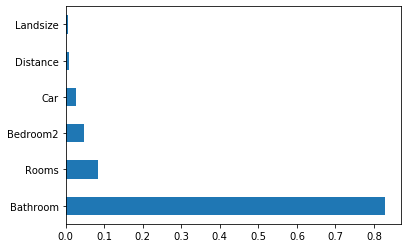

In [75]:
model = ExtraTreesClassifier()
model.fit(X_ready,y_ready)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_ready.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

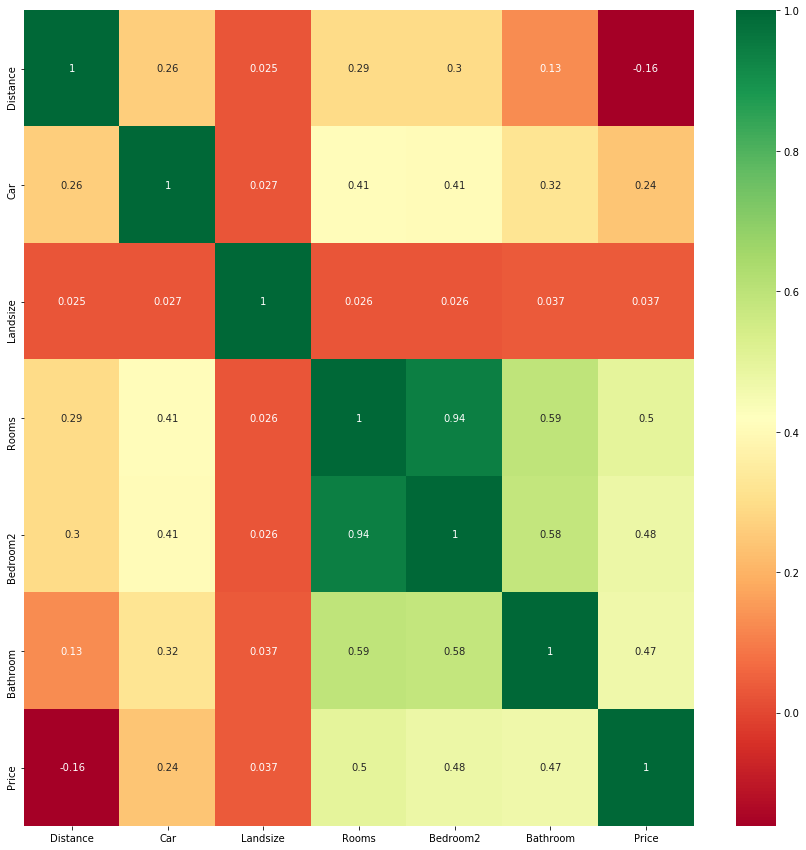

In [84]:
#get correlations of each features in dataset
df_x = df_clean.iloc[:, 0:7]
corrmat = df_x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(df_clean[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## **Feature Selection in Numerical Features**
Numerical and Categorical features are to be treated differently.

In [10]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


In [11]:
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### **1. Filter Method**
As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable MEDV. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

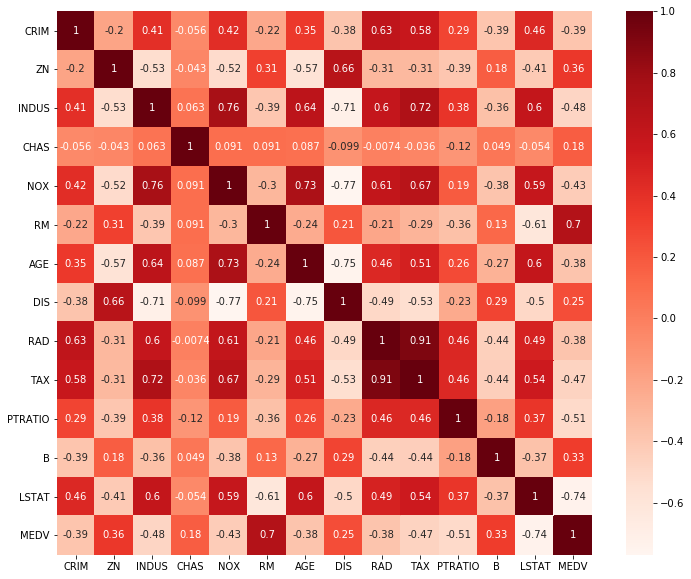

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [14]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


### **2. Wrapper Method**
A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

There are different wrapper methods such as Backward Elimination, Forward Selection, Bidirectional Elimination and RFE. We will discuss Backward Elimination and RFE here.

**i. Backward Elimination**

As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

In [15]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

**ii. RFE (Recursive Feature Elimination)**

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [19]:
model = LinearRegression()#Initializing RFE model
rfe = RFE(model, 7)#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  #Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False False False  True False False False False
 False False  True False False  True False  True]
[ 8  1  1  1  2  3  6  1  5  7 14 13  9  4  1 10 12  1 11  1]


### **3. Embedded Method**
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.


**Note**
- Filter method is less accurate. It is great while doing EDA, it can also be used for checking multi co-linearity in data.

- Wrapper and Embedded methods give more accurate results but as they are computationally expensive, these method are suited when you have lesser features (~20).

## **Feature Selection in Categorical Features**
Feature selection is often straightforward when working with real-valued data, such as using the Pearson’s correlation coefficient, but can be challenging when working with categorical data.

The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are the chi-squared statistic and the mutual information statistic.

### **1. Chi-Squared Feature Selection**
Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.

The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.

The scikit-learn machine library provides an implementation of the chi-squared test in the chi2() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

### **2. Mutual Information Feature Selection**
Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the mutual_info_classif() function.

Like chi2(), it can be used in the SelectKBest feature selection strategy (and other strategies).

## **Source Dataset**
- Mobile Price Classification, https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv
- Breast Cancer Wisconsin (Diagnostic) Data Set, https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

#### **Reference**:
* Raheel Shaikh, "Feature Selection Techniques in Machine Learning with Python", https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

* Abhini Shetye, "Feature Selection with sklearn and Pandas", https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

* Jason Brownlee, "How to Perform Feature Selection with Categorical Data", https://machinelearningmastery.com/feature-selection-with-categorical-data/

* https://towardsdatascience.com/categorical-feature-selection-via-chi-square-fc558b09de43
